In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
import dataframe_image as dfi
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [3]:
Ames = pd.read_csv('Ames_HousePrice.csv')

In [4]:
Ames.head() #1st 5 rows

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [5]:
#drop extra unnamed column
Ames = Ames.drop('Unnamed: 0', axis=1)

In [6]:
Ames_Data_Types = pd.DataFrame({'Column': Ames.columns, 'Data Type': Ames.dtypes.values})
#Ames_Data_Types.to_csv('Ames_Data_Types.csv', index=False)  #Export, only needed once

In [7]:
#initial inspection
print('Column List\n', Ames.columns) #column list
print('\nStatistical Snapshot:\n', Ames.describe()) #statistical snapshot
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values
print('\nDuplicate Rows:\n', Ames[Ames.duplicated(keep=False)]) #duplicate rows

Column List
 Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

In [8]:
Ames = Ames.drop_duplicates(keep = 'first')
print('\nDuplicate Rows:\n', Ames[Ames.duplicated(keep=False)]) #duplicate rows


Duplicate Rows:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows 

In [9]:
Ames_Missing_Values = (
    Ames.isnull().sum()[Ames.isnull().sum() != 0]
    .to_frame('MissingCount')
    .assign(MissingPercent=lambda x: 100 * x['MissingCount'] / len(Ames))
    .reset_index()
    .rename(columns={'index': 'ColumnName'})
)
Ames_Missing_Columns = Ames_Missing_Values['ColumnName']
Ames_Missing_Values

,ColumnName,MissingCount,MissingPercent
0,LotFrontage,462,18
1,Alley,2411,93
2,MasVnrType,1572,61
3,MasVnrArea,14,1
4,BsmtQual,69,3
5,BsmtCond,69,3
6,BsmtExposure,71,3
7,BsmtFinType1,69,3
8,BsmtFinSF1,1,0
9,BsmtFinType2,70,3


In [10]:
Ames_Missing_Columns = Ames[Ames_Missing_Values['ColumnName']]
Ames_Missing_Columns_Numeric = Ames_Missing_Columns.select_dtypes(include=['number'])
Ames_Missing_Columns_Categorical = Ames_Missing_Columns.select_dtypes(include=['object', 'category'])
for col in Ames_Missing_Columns_Categorical.columns:
    print(f'\nValue counts for {col}:')
    print(Ames_Missing_Columns_Categorical[col].value_counts(dropna=False))


Value counts for Alley:
Alley
NaN     2411
Grvl     105
Pave      63
Name: count, dtype: int64

Value counts for MasVnrType:
MasVnrType
NaN        1572
BrkFace     804
Stone       183
BrkCmn       20
Name: count, dtype: int64

Value counts for BsmtQual:
BsmtQual
TA     1166
Gd     1076
Ex      188
Fa       78
NaN      69
Po        2
Name: count, dtype: int64

Value counts for BsmtCond:
BsmtCond
TA     2315
Gd      101
Fa       88
NaN      69
Ex        3
Po        3
Name: count, dtype: int64

Value counts for BsmtExposure:
BsmtExposure
No     1708
Av      344
Gd      242
Mn      214
NaN      71
Name: count, dtype: int64

Value counts for BsmtFinType1:
BsmtFinType1
GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    250
LwQ    139
NaN     69
Name: count, dtype: int64

Value counts for BsmtFinType2:
BsmtFinType2
Unf    2179
Rec      97
LwQ      84
NaN      70
BLQ      64
ALQ      53
GLQ      32
Name: count, dtype: int64

Value counts for Electrical:
Electrical
SBrkr    2364
FuseA     168


In [11]:
Ames_Missing_Columns_Numeric.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,NaN,0,238,0,618,856,1,0,"1,939",2,399
1,42,149,552,393,104,"1,049",1,0,"1,984",1,266
2,60,0,737,0,100,837,0,0,"1,930",1,216
3,80,0,0,0,405,405,0,0,"1,940",1,281
4,70,0,643,0,167,810,1,0,"2,001",2,528


In [12]:
#Round 1 Imputation: Zoning & Quality Pivot Tables
Zoning_Shape_Pivot = Ames.pivot_table(
    index=['MSZoning', 'LotShape'],
    aggfunc={'LotFrontage': 'mean', 'LotArea': 'mean'}
).rename(columns={
    'LotFrontage': 'LotFrontage_Mean',
    'LotArea': 'LotArea_Mean'
})

OverallQual_Cond_Pivot = Ames.pivot_table(
    index=['OverallQual', 'OverallCond'],
    aggfunc={
        'Electrical': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'MasVnrType': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'Electrical': 'Electrical_Mode',
    'MasVnrType': 'MasVnrType_Mode'
})

#Merge Pivots into Ames
Ames = Ames.merge(Zoning_Shape_Pivot.reset_index(), on=['MSZoning', 'LotShape'], how='left')
Ames = Ames.merge(OverallQual_Cond_Pivot.reset_index(), on=['OverallQual', 'OverallCond'], how='left')

#Impute LotFrontage proportionally to LotArea
fallback_ratio = Ames['LotFrontage'].dropna().mean() / Ames['LotArea'].dropna().mean()
Ames['LotFrontage'] = Ames['LotFrontage'].fillna(
    (Ames['LotFrontage_Mean'] / Ames['LotArea_Mean'] * Ames['LotArea']).fillna(fallback_ratio * Ames['LotArea'])
)

#Impute Electrical
Ames['Electrical'] = Ames['Electrical'].fillna(Ames['Electrical_Mode'])
Ames['Electrical'] = Ames['Electrical'].fillna(Ames['Electrical'].dropna().mode().iloc[0])

#MasVnrType: “No Veneer” where area ≤ 0, else from pivot/mode
Ames.loc[Ames['MasVnrType'].isnull() & (Ames['MasVnrArea'] <= 0), 'MasVnrType'] = 'No Veneer'
Ames['MasVnrType'] = Ames['MasVnrType'].fillna(Ames['MasVnrType_Mode'])
Ames['MasVnrType'] = Ames['MasVnrType'].fillna(Ames['MasVnrType'].dropna().mode().iloc[0])

#Clean up Round 1 merge columns
Ames.drop(['LotFrontage_Mean', 'LotArea_Mean', 'Electrical_Mode', 'MasVnrType_Mode'], axis=1, inplace=True)

#Simple Fill for Remaining NAs
Ames.fillna({
    'Alley': 'No Alley Access',
    'BsmtCond': 'No Basement',
    'BsmtExposure': 'No Basement',
    'BsmtFinType1': 'No Basement',
    'BsmtQual': 'No Basement',
    'Fence': 'No Fence',
    'FireplaceQu': 'No Fireplace',
    'GarageType': 'No Garage',
    'MiscFeature': 'No Misc Feature',
    'PoolQC': 'No Pool'
}, inplace=True)

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea']:
    Ames[col] = Ames[col].fillna(0)
Ames['MasVnrArea'] = Ames['MasVnrArea'].replace({1: 0})  # correction

In [13]:
#Round 2 Imputation: Garage Pivot Tables
OverallQual_Cond_GarageType_Pivot = Ames.pivot_table(
    index=['OverallQual', 'OverallCond', 'GarageType'],
    aggfunc={
        'GarageFinish': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'GarageQual': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'GarageCond': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'GarageFinish': 'GarageFinish_Mode',
    'GarageQual': 'GarageQual_Mode',
    'GarageCond': 'GarageCond_Mode'
})

#Merge Pivot
Ames = Ames.merge(OverallQual_Cond_GarageType_Pivot.reset_index(),
                  on=['OverallQual', 'OverallCond', 'GarageType'], how='left')

#Imputations
Ames.loc[Ames['GarageType'] == 'No Garage', ['GarageFinish', 'GarageQual', 'GarageCond']] = 'No Garage'
Ames['GarageYrBlt'] = Ames['GarageYrBlt'].fillna(Ames['YearBuilt'])
Ames['GarageFinish'] = Ames['GarageFinish'].fillna(Ames['GarageFinish_Mode'])
Ames['GarageQual'] = Ames['GarageQual'].fillna(Ames['GarageQual_Mode'])
Ames['GarageCond'] = Ames['GarageCond'].fillna(Ames['GarageCond_Mode'])

#Fallbacks
for col in ['GarageFinish', 'GarageQual', 'GarageCond']:
    Ames[col] = Ames[col].fillna(Ames[col].dropna().mode().iloc[0])

#Drop merged columns
Ames.drop(['GarageFinish_Mode', 'GarageQual_Mode', 'GarageCond_Mode'], axis=1, inplace=True)

In [14]:
#BsmtFinType2 Imputation
Ames.loc[Ames['BsmtFinType1'] == 'No Basement', 'BsmtFinType2'] = 'No Basement'
Ames['BsmtFinType2'] = Ames['BsmtFinType2'].fillna(Ames['BsmtFinType2'].dropna().mode().iloc[0])

#Round 3 Imputation: Garage & Basement Pivot Tables
Garage_Qual_Cond_Type_Pivot = Ames.pivot_table(
    index=['GarageQual', 'GarageCond', 'GarageType'],
    aggfunc={
        'GarageArea': 'mean',
        'GarageCars': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'GarageArea': 'GarageArea_Mean',
    'GarageCars': 'GarageCars_Mode'
})

Basement_Qual_FinType1_FinType2_Pivot = Ames.pivot_table(
    index=['BsmtQual', 'BsmtFinType1', 'BsmtFinType2'],
    aggfunc={
        'BsmtFullBath': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'BsmtHalfBath': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'BsmtFullBath': 'BsmtFullBath_Mode',
    'BsmtHalfBath': 'BsmtHalfBath_Mode'
})

#Merge both pivots
Ames = Ames.merge(Garage_Qual_Cond_Type_Pivot.reset_index(),
                  on=['GarageQual', 'GarageCond', 'GarageType'], how='left')
Ames = Ames.merge(Basement_Qual_FinType1_FinType2_Pivot.reset_index(),
                  on=['BsmtQual', 'BsmtFinType1', 'BsmtFinType2'], how='left')

#Impute numeric + categorical
Ames['GarageArea'] = Ames['GarageArea'].fillna(Ames['GarageArea_Mean'])
Ames['GarageCars'] = Ames['GarageCars'].fillna(Ames['GarageCars_Mode'])
Ames['BsmtFullBath'] = Ames['BsmtFullBath'].fillna(Ames['BsmtFullBath_Mode'])
Ames['BsmtHalfBath'] = Ames['BsmtHalfBath'].fillna(Ames['BsmtHalfBath_Mode'])

#Global fallback fill for residual NaNs
for col in ['GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath']:
    if Ames[col].isnull().any():
        if Ames[col].dtype.kind in 'biufc':
            Ames[col] = Ames[col].fillna(Ames[col].mean())
        else:
            Ames[col] = Ames[col].fillna(Ames[col].mode().iloc[0])

#Drop temporary pivot columns
Ames.drop([
    'GarageArea_Mean', 'GarageCars_Mode',
    'BsmtFullBath_Mode', 'BsmtHalfBath_Mode'
], axis=1, inplace=True)

In [15]:
#Missing Value Check
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values


Columns with Missing Values:
 Series([], dtype: int64)

Rows with Missing Values:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, Mis

In [16]:
Ames_Columns_Numeric = Ames[[
    '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
    'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
    'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
    'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF',
    'YearBuilt', 'YearRemodAdd', 'YrSold'
]]
Ames_Columns_Ordinal = Ames[[
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
    'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional',
    'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
    'LandSlope', 'LotShape', 'OverallCond', 'OverallQual', 'PavedDrive',
    'PoolQC', 'Utilities'
]]
Ames_Columns_Nominal = Ames[[ 
    'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
    'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating',
    'HouseStyle', 'LandContour', 'LotConfig', 'MasVnrType', 'MiscFeature',
    'MSSubClass', 'MSZoning', 'Neighborhood', 'RoofMatl', 'RoofStyle',
    'SaleCondition', 'SaleType', 'Street'
]].astype(str)
assert Ames_Columns_Numeric.index.equals(Ames_Columns_Nominal.index)

In [17]:
value_count_list = []
for col in Ames_Columns_Ordinal.columns:
    counts = Ames_Columns_Ordinal[col].value_counts(dropna=False)
    temp_df = pd.DataFrame({
        'Column Name': col,
        'Value': counts.index,
        'Value Count': counts.values
    })
    value_count_list.append(temp_df)
Ames_Ordinal_ValueCounts = pd.concat(value_count_list, ignore_index=True)
Ames_Ordinal_ValueCounts
#Ames_Ordinal_ValueCounts.to_csv('Ames_Ordinal_ValueCounts.csv', index=False)

,Column Name,Value,Value Count
0,BsmtCond,TA,2315
1,BsmtCond,Gd,101
2,BsmtCond,Fa,88
3,BsmtCond,No Basement,69
4,BsmtCond,Ex,3
...,...,...,...
119,PoolQC,Ex,2
120,PoolQC,Gd,2
121,PoolQC,Fa,2
122,Utilities,AllPub,2577


In [18]:
#Import Ordinal Value Ordering Legend created based off of Ames_Ordinal_ValueCounts export
Ames_Ordinal_Legend = pd.read_csv('Ames_Ordinal_Legend.csv')

#Convert already numeric ordinal values to string in original Dataset
ordinal_cols = Ames_Ordinal_Legend['Name'].unique()
for col in ordinal_cols:
    if col in Ames.columns:
        Ames[col] = Ames[col].astype(str)
# Loop through columns that are in the ordinal legend
for col in Ames.columns:
    if col in Ames_Ordinal_Legend['Name'].unique():
        # Create the mapping dictionary for this column
        mapping_dict = Ames_Ordinal_Legend.loc[Ames_Ordinal_Legend['Name'] == col,
                                               ['Value', 'Value_Order']].set_index('Value')['Value_Order'].to_dict()
        # Map values in Ames[col] using this dictionary
        Ames[col] = Ames[col].map(mapping_dict)

#Missing Value Check
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values

# Check the data types and unique values
ordinal_cols = Ames_Ordinal_Legend['Name'].unique() # List of ordinal columns
# Check dtype and unique values as plain Python ints
for col in ordinal_cols:
    if col in Ames.columns:
        unique_vals = [int(v) for v in sorted(Ames[col].dropna().unique())]
        print(f"{col}: dtype={Ames[col].dtype}, unique values={unique_vals}")


Columns with Missing Values:
 Series([], dtype: int64)

Rows with Missing Values:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, Mis

In [19]:
#Export Fully Imputed copy
Ames.to_csv('Ames_HousePrice_Imputed.csv', index=False)

#Update with new Ames Data
Ames_Columns_Ordinal = Ames[[ 
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
    'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional',
    'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
    'LandSlope', 'LotShape', 'OverallCond', 'OverallQual', 'PavedDrive',
    'PoolQC', 'Utilities'
]]
#Combination Table of Numeric & Ordinal Columns
Ames_Columns_Numeric_Ordinal = Ames[
    list(Ames_Columns_Numeric.columns) + list(Ames_Columns_Ordinal.columns)
]
#Combination Table of Nominal & Ordinal Columns
Ames_Columns_Nominal_Ordinal = Ames[
    list(Ames_Columns_Nominal.columns) + list(Ames_Columns_Ordinal.columns)
]

In [20]:
#Import HGBM Feature Importance Table for weighted Averaging
Feature_Importances = pd.read_csv('HGBM_Feature_Importances_SHAP_Values.csv')
def get_importance(feature_name, lookup_df=Feature_Importances):
    row = lookup_df.loc[lookup_df['Feature'] == feature_name, 'Importance']
    if not row.empty: return row.values[0]
    else: return 0

In [21]:
#---Feature Engineering---
Ames_Engineered = Ames.copy()

Ames_Engineered['Lot_Frontage_%'] = Ames_Engineered['LotFrontage'] / Ames_Engineered['LotArea']
Ames_Engineered['Living_Area_%of_Lot'] = Ames_Engineered['GrLivArea'] / Ames_Engineered['LotArea']
Ames_Engineered['Interior_Area_%of_Lot'] = (Ames_Engineered['GrLivArea'] + Ames_Engineered['GarageArea'] + Ames_Engineered['TotalBsmtSF']) / Ames_Engineered['LotArea']
Ames_Engineered['1stFlr_%of_Living_Area'] = Ames_Engineered['1stFlrSF'] / Ames_Engineered['GrLivArea']

Ames_Engineered['Total_Bathrooms_prorated'] = Ames_Engineered['FullBath'] + (Ames_Engineered['BsmtFullBath'] * .75) + (Ames_Engineered['HalfBath'] * .5) + (Ames_Engineered['HalfBath'] * .375)
Ames_Engineered['Kitchens_prorated'] = Ames_Engineered['KitchenAbvGr'] * ((Ames_Engineered['KitchenQual'] + 1) * .2)

Ames_Engineered['Home_Age'] = Ames_Engineered['YrSold'] - Ames_Engineered['YearBuilt']
Ames_Engineered['Yrs_Since_Remodel'] = Ames_Engineered['YrSold'] - Ames_Engineered['YearRemodAdd']

#Export Fully Imputed AND ENGINEERED copy
Ames_Engineered.to_csv('Ames_HousePrice_Engineered.csv', index=False)

In [22]:
#Update Ames Engineered Column Lists
Ames_Engineered_Columns_Numeric = Ames_Engineered[[
    '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
    'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
    'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
    'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF',
    'YearBuilt', 'YearRemodAdd', 'YrSold', 'Living_Area_%of_Lot', 'Lot_Frontage_%', 'Home_Age',
    'Yrs_Since_Remodel', '1stFlr_%of_Living_Area', 'Interior_Area_%of_Lot', 'Total_Bathrooms_prorated', 'Kitchens_prorated'
]]
Ames_Engineered_Columns_Ordinal = Ames_Engineered[[
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
    'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional',
    'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
    'LandSlope', 'LotShape', 'OverallCond', 'OverallQual', 'PavedDrive',
    'PoolQC', 'Utilities'
]]
Ames_Engineered_Columns_Nominal = Ames_Engineered[[
    'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
    'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating',
    'HouseStyle', 'LandContour', 'LotConfig', 'MasVnrType', 'MiscFeature',
    'MSSubClass', 'MSZoning', 'Neighborhood', 'RoofMatl', 'RoofStyle',
    'SaleCondition', 'SaleType', 'Street'
]].astype(str)
assert Ames_Engineered_Columns_Numeric.index.equals(Ames_Engineered_Columns_Nominal.index)

#Combination Table of Numeric & Ordinal Columns
Ames_Engineered_Columns_Numeric_Ordinal = Ames_Engineered[
    list(Ames_Engineered_Columns_Numeric.columns) + list(Ames_Engineered_Columns_Ordinal.columns)
]
#Combination Table of Nominal & Ordinal Columns
Ames_Engineered_Columns_Nominal_Ordinal = Ames_Engineered[
    list(Ames_Engineered_Columns_Nominal.columns) + list(Ames_Engineered_Columns_Ordinal.columns)
]

In [23]:
#Custom Histogram KDE Function
def custom_kde(frame_name, col_name):
    
    sns.set_style('whitegrid')      # Style setup

    # Calculate Mean, Median, Mode for SalePrice
    mean_col = frame_name[col_name].mean()
    median_col = frame_name[col_name].median()
    mode_col = frame_name[col_name].mode().values[0]
     
    # Plotting histogram
    plt.figure(figsize=(14, 7))
    sns.histplot(x=frame_name[col_name], bins=100, kde=True, color='skyblue')
    plt.axvline(mean_col, color='r', linestyle='--', label=f'Mean: {mean_col:,.0f}')
    plt.axvline(median_col, color='g', linestyle='-', label=f'Median: {median_col:,.0f}')
    plt.axvline(mode_col, color='b', linestyle='-.', label=f'Mode: {mode_col:,.0f}')
     
    # Annotations for skewness and kurtosis
    plt.annotate('Skewness: {:.2f}\nKurtosis: {:.2f}'.format(frame_name[col_name].skew(), frame_name[col_name].kurt()),
                 xy=(500000, 100), fontsize=14, bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue'))
     
    plt.title(col_name)
    plt.legend()
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
    plt.show()

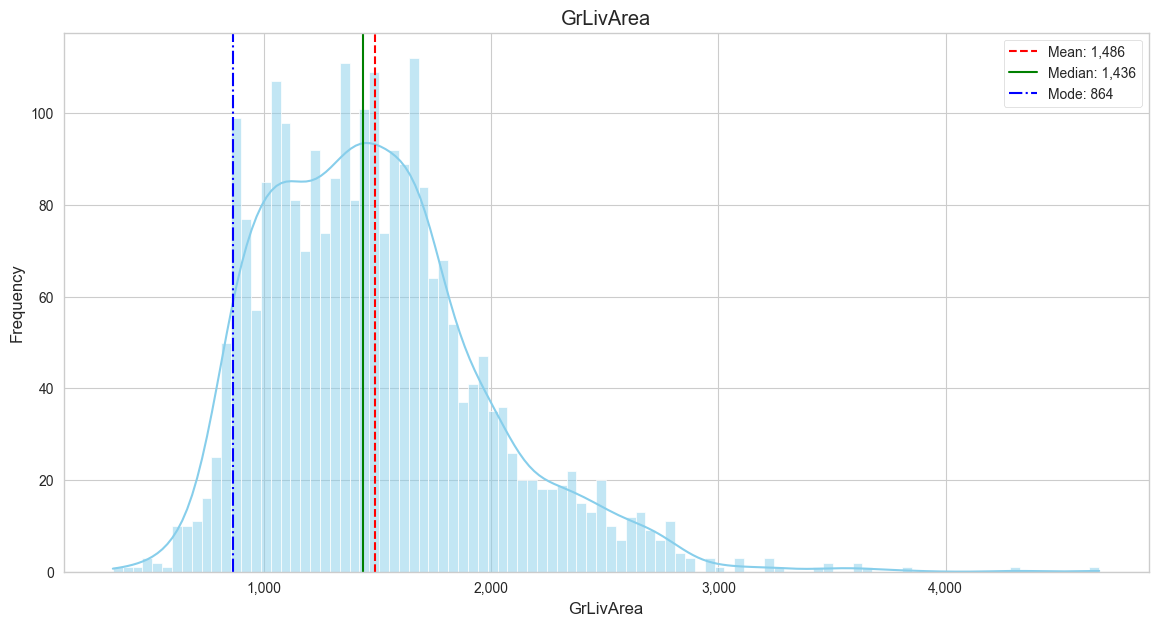

In [24]:
custom_kde(Ames, 'GrLivArea')

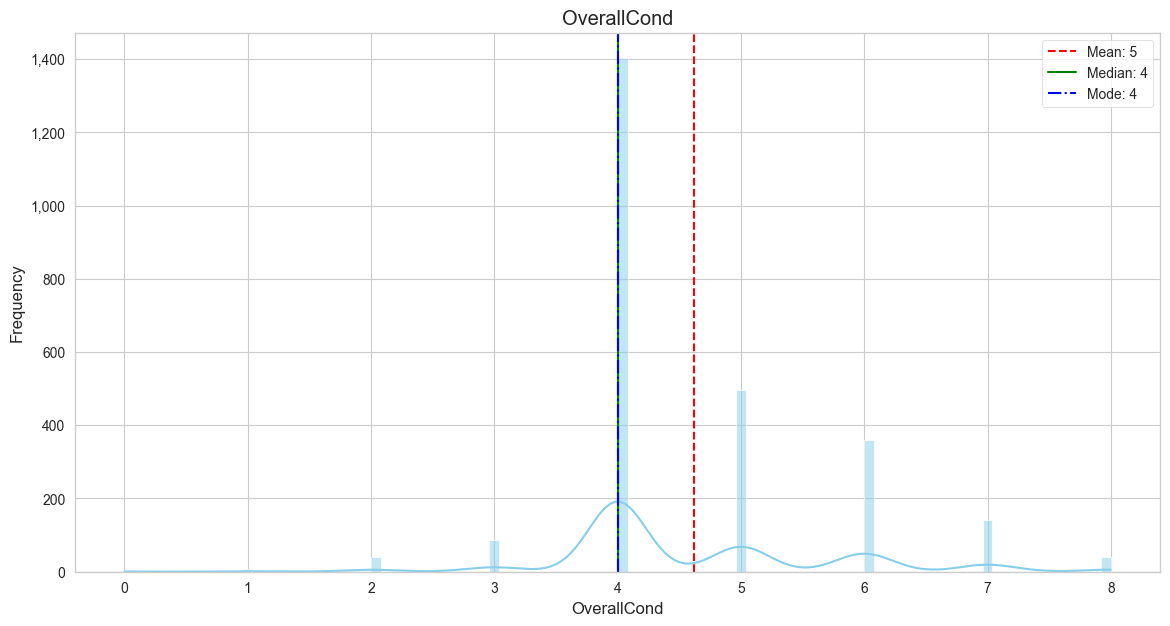

In [25]:
custom_kde(Ames, 'OverallCond')

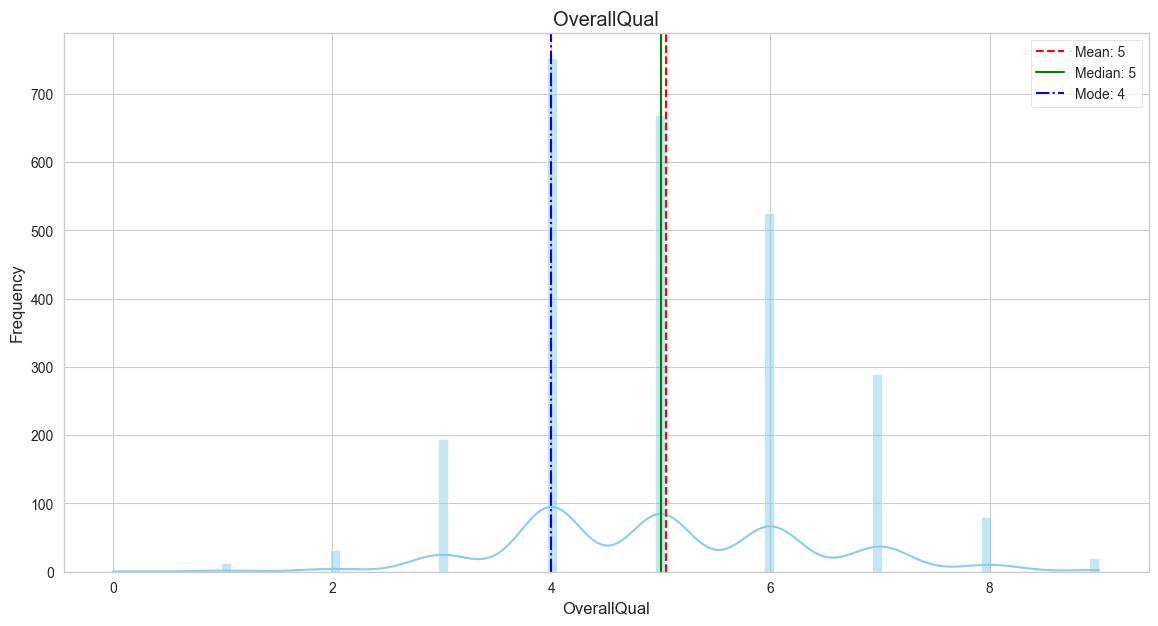

In [26]:
custom_kde(Ames, 'OverallQual')

Text(0, 0.5, 'Price')

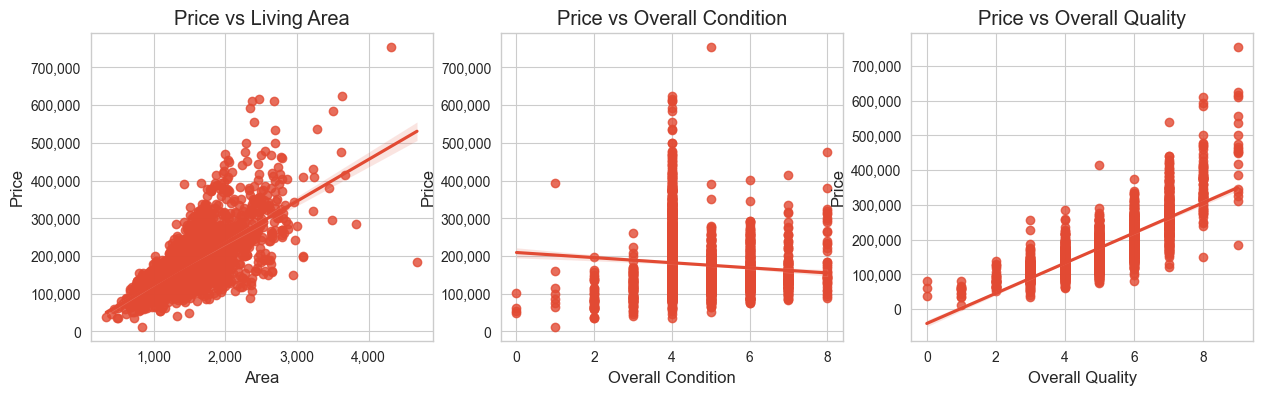

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

scat1 = sns.regplot(x='GrLivArea', y='SalePrice', data=Ames, ax=ax[0])
scat1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[0].set_title('Price vs Living Area')
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Price')
 
scat2 = sns.regplot(x='OverallCond', y='SalePrice', data=Ames, ax=ax[1])
scat2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[1].set_title('Price vs Overall Condition')
ax[1].set_xlabel('Overall Condition')
ax[1].set_ylabel('Price')

scat3 = sns.regplot(x='OverallQual', y='SalePrice', data=Ames, ax=ax[2])
scat3.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat3.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[2].set_title('Price vs Overall Quality')
ax[2].set_xlabel('Overall Quality')
ax[2].set_ylabel('Price')

In [28]:
# Initialize model and KFold
Y = Ames_Engineered['SalePrice']
lm = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=2)

#Feature sets to evaluate
feature_sets = [
    ['GrLivArea', 'OverallQual', 'OverallCond'],
    ['GrLivArea', 'OverallQual'],
    ['OverallQual'],
]
#Generate & Print Results for each Set
for features in feature_sets:
    print(f'\n--- Features: {features} ---')
    X = Ames_Engineered[features]
    lm.fit(X, Y)
    r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')

    print(f"R² per fold (sorted): {', '.join(f'{score:.4f}' for score in sorted(r2))}")
    print(f'R² Avgerage: {r2.mean():.4f}')
    print(f'Intercept: {lm.intercept_:.2f}')
    print('Coefficients:')
    for name, coef in zip(features, lm.coef_):
        print(f'  {name:<15}: {coef:.4f}')


--- Features: ['GrLivArea', 'OverallQual', 'OverallCond'] ---
R² per fold (sorted): 0.7109, 0.7138, 0.7342, 0.7391, 0.7771
R² Avgerage: 0.7350
Intercept: -68893.34
Coefficients:
  GrLivArea      : 61.9534
  OverallQual    : 30960.0736
  OverallCond    : -293.1402

--- Features: ['GrLivArea', 'OverallQual'] ---
R² per fold (sorted): 0.7109, 0.7139, 0.7351, 0.7391, 0.7772
R² Avgerage: 0.7352
Intercept: -70387.83
Coefficients:
  GrLivArea      : 62.0045
  OverallQual    : 30972.9054

--- Features: ['OverallQual'] ---
R² per fold (sorted): 0.5941, 0.6152, 0.6222, 0.6235, 0.6654
R² Avgerage: 0.6241
Intercept: -40880.95
Coefficients:
  OverallQual    : 43383.1577


SFS with NUMERIC Columns Only
Top 5 Features & Individual Performance (R²)
Feature: GrLivArea                      Mean CV Score: 0.5127
Feature: TotalBsmtSF                    Mean CV Score: 0.4064
Feature: Total_Bathrooms_prorated       Mean CV Score: 0.3995
Feature: GarageCars                     Mean CV Score: 0.3970
Feature: 1stFlrSF                       Mean CV Score: 0.3957

Mean CV Score for MLR Model w Top 5 Features: 0.7326

Top 5 Feature Combination selected by SFS: ['BedroomAbvGr', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
Mean CV Score using SFS (n=5): 0.7842



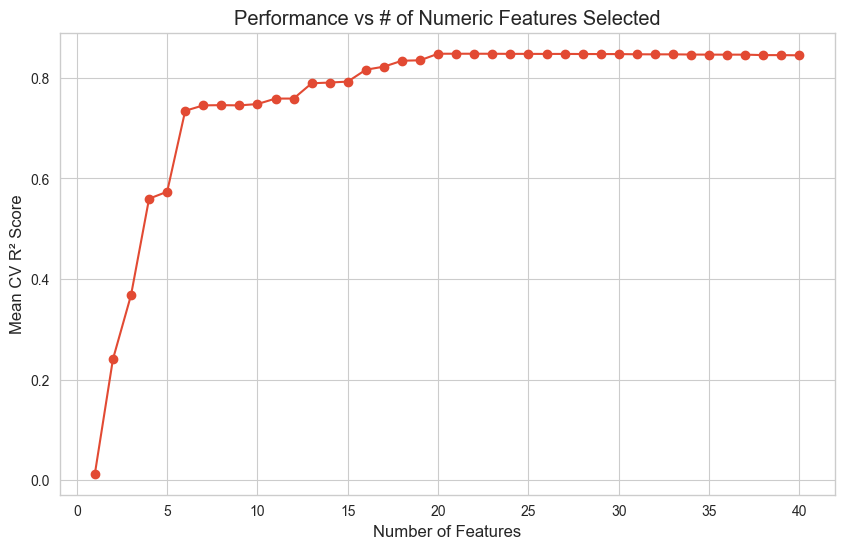


Optimal Number of Selected Features: 22
Optimal Selected Features: ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces', 'GarageArea', 'GarageCars', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MoSold', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'Living_Area_%of_Lot', 'Yrs_Since_Remodel', 'Interior_Area_%of_Lot', 'Kitchens_prorated']
Mean CV Score using SFS (n=5, tol=0.005): 0.8479


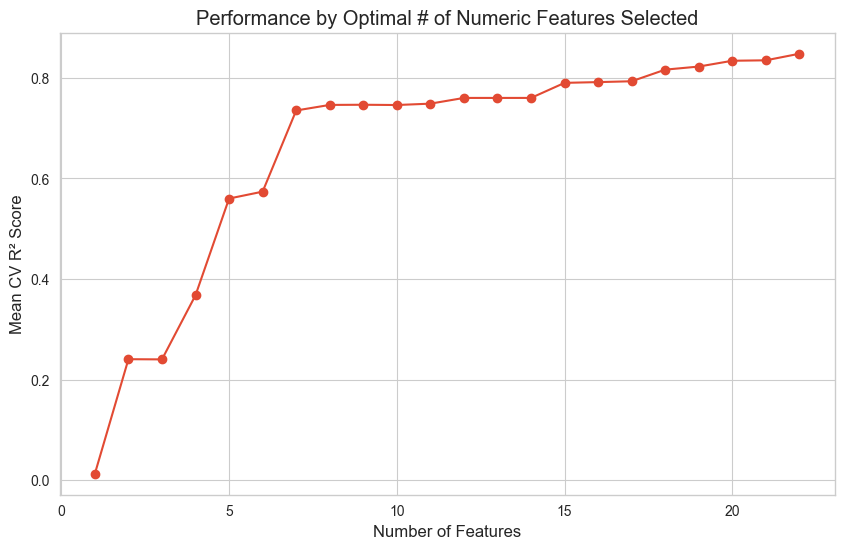

In [29]:
#Numeric Only SFS
X = Ames_Engineered_Columns_Numeric
lm = LinearRegression()
feature_scores_MLR_numeric = {}

#CV Evaluation by Feature
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(lm, X_single, Y)
    feature_scores_MLR_numeric[feature] = cv_scores.mean()

#Identify Top 5 features (based on mean CV R² scores)
sorted_features_MLR_numeric = sorted(feature_scores_MLR_numeric.items(), key=lambda item: item[1], reverse=True)
top_5_MLR_numeric = sorted_features_MLR_numeric[0:5]
 
#Display Top 5 features & their performance
print('SFS with NUMERIC Columns Only')
print('Top 5 Features & Individual Performance (R²)')
for feature, score in top_5_MLR_numeric:
    print(f'Feature: {feature:<30} Mean CV Score: {score:.4f}')
	
#-----------------------------------------------------------------------------------------------
top_features_MLR_numeric = [feature for feature, score in top_5_MLR_numeric]  # Extract Top 5 Features for MLR
X_top_MLR_numeric = Ames_Engineered[top_features_MLR_numeric]   # Model with Top 5 features
 
#CV Evaluation
cv_scores_mlr_MLR_numeric = cross_val_score(lm, X_top_MLR_numeric, Y, cv=5, scoring='r2')
mean_mlr_score_MLR_numeric = cv_scores_mlr_MLR_numeric.mean()
print(f'\nMean CV Score for MLR Model w Top 5 Features: {mean_mlr_score_MLR_numeric:.4f}')

#-----------------------------------------------------------------------------------------------
# Top 5 Feature Combination with Score
sfs = SequentialFeatureSelector(lm, n_features_to_select=5)
sfs.fit(X, Y)
selected_features_MLR_numeric = X.columns[sfs.get_support()].to_list()
scores = cross_val_score(lm, Ames_Engineered[selected_features_MLR_numeric], Y)

print(f'\nTop 5 Feature Combination selected by SFS: {selected_features_MLR_numeric}')
print(f'Mean CV Score using SFS (n=5): {scores.mean():.4f}\n')

#-----------------------------------------------------------------------------------------------
# Efficient loop: Mean CV Scores for 1 to all numeric features
mean_scores_MLR_numeric = []

#Fit SFS once for full feature selection
sfs_full = SequentialFeatureSelector(lm, n_features_to_select='auto')
sfs_full.fit(X, Y)
mask_full = sfs_full.get_support()
selected_full = X.columns[mask_full]

#Incrementally evaluate subsets of features
for n in range(1, len(X.columns)):
    if n <= len(selected_full):
        subset_features = selected_full[:n]
    else:
        remaining_features = [f for f in X.columns if f not in selected_full]
        subset_features = list(selected_full) + remaining_features[: n - len(selected_full)]
    
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_MLR_numeric.append(score)

# Plot Mean CV Scores against # of Features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores_MLR_numeric, marker='o')
plt.title('Performance vs # of Numeric Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------
#Efficient SFS with tolerance level
sfs_tol = SequentialFeatureSelector(lm, n_features_to_select='auto', tol=0.000005)
sfs_tol.fit(X, Y)
mask_tol = sfs_tol.get_support()
selected_tol = X.columns[mask_tol]
n_features_selected = sum(mask_tol)

#Incrementally evaluate CV scores using tolerance-based selection
mean_scores_tol_MLR_numeric = []
for n in range(1, n_features_selected + 1):
    subset_features = selected_tol[:n]
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_tol_MLR_numeric.append(score)

#Print selected Features & Performance
print(f'\nOptimal Number of Selected Features: {n_features_selected}')
print(f'Optimal Selected Features: {selected_tol.tolist()}')
print(f'Mean CV Score using SFS (n=5, tol=0.005): {mean_scores_tol_MLR_numeric[-1]:.4f}')
Ames_Engineered_MLR_Optimal_Numeric_Column_List = selected_tol.tolist()

#Plot Mean CV Scores for each # of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol_MLR_numeric, marker='o')
plt.title('Performance by Optimal # of Numeric Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

SFS with ORDINAL Columns Only
Top 5 Features & Individual Performance (R²)
Feature: OverallQual          Mean CV Score: 0.6183
Feature: ExterQual            Mean CV Score: 0.4518
Feature: KitchenQual          Mean CV Score: 0.4127
Feature: BsmtQual             Mean CV Score: 0.3297
Feature: GarageFinish         Mean CV Score: 0.2723

Mean CV Score for MLR Model w Top 5 Features: 0.6761

Top 5 Feature Combination selected by SFS: ['BsmtExposure', 'ExterQual', 'FireplaceQu', 'KitchenQual', 'OverallQual']
Mean CV Score using SFS (n=5): 0.7078



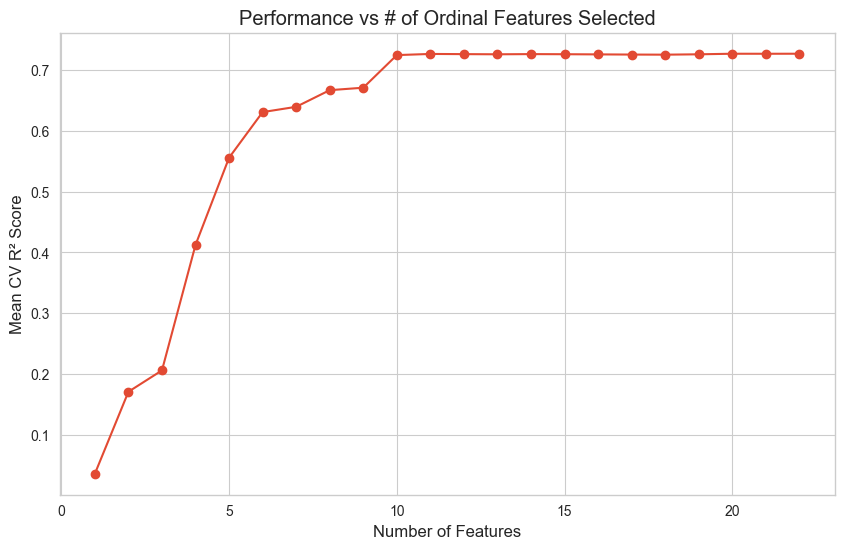


Optimal Number of Selected Features: 12
Optimal Selected Features: ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterQual', 'FireplaceQu', 'GarageFinish', 'KitchenQual', 'LandSlope', 'LotShape', 'OverallQual', 'PoolQC']
Mean CV Score using SFS (tol=0.005): 0.7270


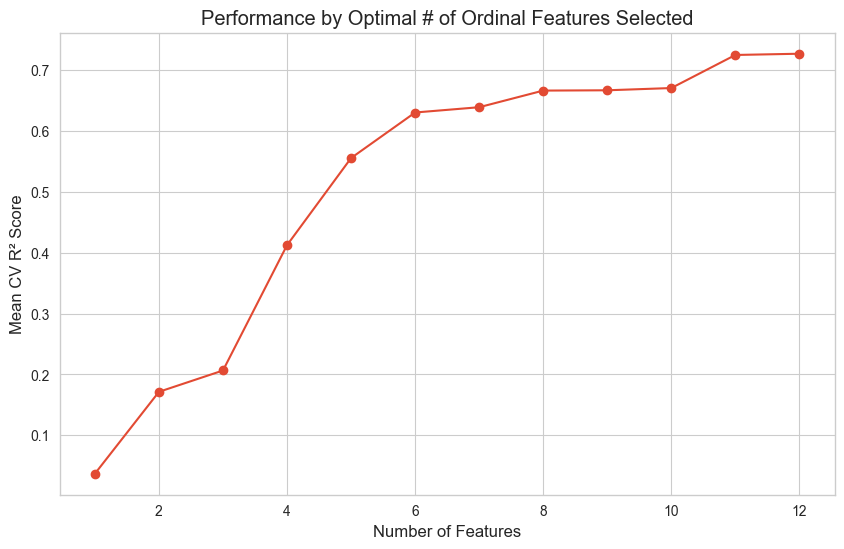

In [30]:
#Ordinal Only SFS
X = Ames_Engineered_Columns_Ordinal
lm = LinearRegression()
feature_scores_MLR_ordinal = {}

#CV Evaluation by Feature
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(lm, X_single, Y)
    feature_scores_MLR_ordinal[feature] = cv_scores.mean()
 
#Identify Top 5 features (based on mean CV R² scores)
sorted_features_MLR_ordinal = sorted(feature_scores_MLR_ordinal.items(), key=lambda item: item[1], reverse=True)
top_5_MLR_ordinal = sorted_features_MLR_ordinal[0:5]
 
#Display Top 5 features & their performance
print('SFS with ORDINAL Columns Only')
print('Top 5 Features & Individual Performance (R²)')
for feature, score in top_5_MLR_ordinal:
    print(f'Feature: {feature:<20} Mean CV Score: {score:.4f}')
	
#-----------------------------------------------------------------------------------------------
top_features_MLR_ordinal = [feature for feature, score in top_5_MLR_ordinal]  # Extract Top 5 Features for MLR
X_top_MLR_ordinal = Ames_Engineered[top_features_MLR_ordinal]   # Model with Top 5 features
 
# CV Evaluation
cv_scores_mlr_MLR_ordinal = cross_val_score(lm, X_top_MLR_ordinal, Y, cv=5, scoring='r2')
mean_mlr_score_MLR_ordinal = cv_scores_mlr_MLR_ordinal.mean()
print(f'\nMean CV Score for MLR Model w Top 5 Features: {mean_mlr_score_MLR_ordinal:.4f}')

#-----------------------------------------------------------------------------------------------
#Top 5 Feature Combination with Score
sfs = SequentialFeatureSelector(lm, n_features_to_select=5)
sfs.fit(X, Y)
selected_features_MLR_ordinal = X.columns[sfs.get_support()].to_list()
scores = cross_val_score(lm, Ames_Engineered[selected_features_MLR_ordinal], Y)

print(f'\nTop 5 Feature Combination selected by SFS: {selected_features_MLR_ordinal}')
print(f'Mean CV Score using SFS (n=5): {scores.mean():.4f}\n')

#-----------------------------------------------------------------------------------------------
#Efficient loop: Mean CV Scores for 1 to all ordinal features
mean_scores_MLR_ordinal = []

#Fit SFS once for full feature selection
sfs_full = SequentialFeatureSelector(lm, n_features_to_select='auto')
sfs_full.fit(X, Y)
mask_full = sfs_full.get_support()
selected_full = X.columns[mask_full]

#Evaluate subsets of features
for n in range(1, len(X.columns)):
    if n <= len(selected_full):
        subset_features = selected_full[:n]
    else:
        remaining_features = [f for f in X.columns if f not in selected_full]
        subset_features = list(selected_full) + remaining_features[: n - len(selected_full)]
    
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_MLR_ordinal.append(score)

#Plot Mean CV Scores against # of Features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores_MLR_ordinal, marker='o')
plt.title('Performance vs # of Ordinal Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------
#SFS with tolerance level
sfs_tol = SequentialFeatureSelector(lm, n_features_to_select='auto', tol=0.0008)
sfs_tol.fit(X, Y)
mask_tol = sfs_tol.get_support()
selected_tol = X.columns[mask_tol]
n_features_selected = sum(mask_tol)

#Evaluate subsets of features
mean_scores_tol_MLR_ordinal = []
for n in range(1, n_features_selected + 1):
    subset_features = selected_tol[:n]
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_tol_MLR_ordinal.append(score)

#Print selected Features & Performance
print(f'\nOptimal Number of Selected Features: {n_features_selected}')
print(f'Optimal Selected Features: {selected_tol.tolist()}')
print(f'Mean CV Score using SFS (tol=0.005): {mean_scores_tol_MLR_ordinal[-1]:.4f}')

#Plot Mean CV Scores for each # of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol_MLR_ordinal, marker='o')
plt.title('Performance by Optimal # of Ordinal Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

SFS with NUMERIC & ORDINAL Columns
Top 5 Features & Individual Performance (R²)
Feature: OverallQual                    Mean CV Score: 0.6183
Feature: GrLivArea                      Mean CV Score: 0.5127
Feature: ExterQual                      Mean CV Score: 0.4518
Feature: KitchenQual                    Mean CV Score: 0.4127
Feature: TotalBsmtSF                    Mean CV Score: 0.4064

Mean CV Score for MLR Model w Top 5 Features: 0.8106

Top 5 Feature Combination selected by SFS: ['BsmtFinSF1', 'GrLivArea', 'Living_Area_%of_Lot', 'ExterQual', 'OverallQual']
Mean CV Score using SFS (n=5): 0.8344



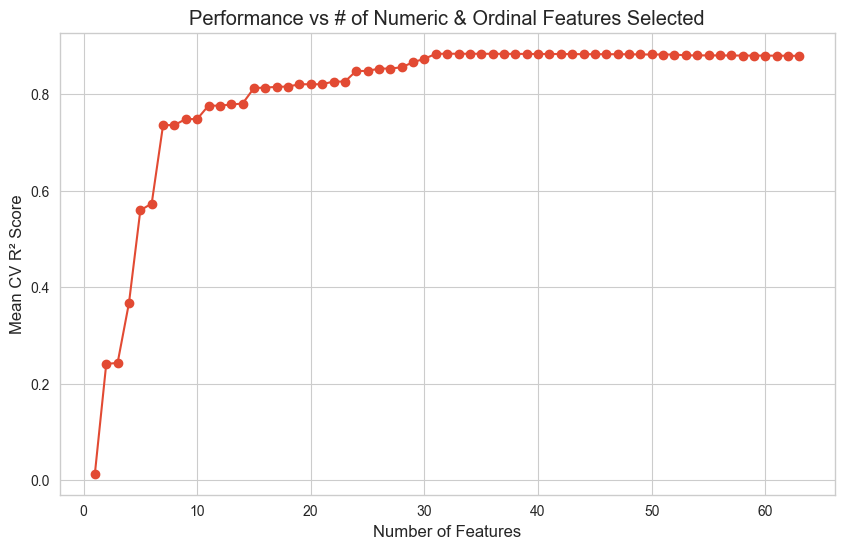


Optimal Number of Selected Features: 31
Optimal Selected Features: ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'Fireplaces', 'GarageArea', 'GarageCars', 'GrLivArea', 'LotArea', 'MasVnrArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Living_Area_%of_Lot', 'Home_Age', 'Interior_Area_%of_Lot', 'Kitchens_prorated', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'ExterQual', 'Fence', 'Functional', 'GarageCond', 'HeatingQC', 'KitchenQual', 'OverallCond', 'OverallQual', 'PoolQC']
Mean CV Score using SFS (tol=0.005): 0.8835


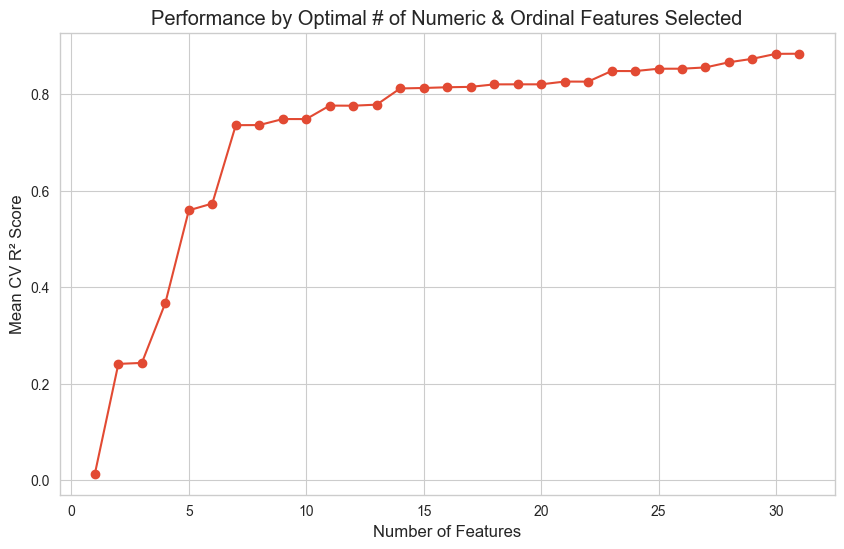

In [31]:
#Numeric & Ordinal SFS
X = Ames_Engineered_Columns_Numeric_Ordinal
lm = LinearRegression()
feature_scores_MLR_numeric_ordinal = {}

#CV Evaluation by Feature
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(lm, X_single, Y)
    feature_scores_MLR_numeric_ordinal[feature] = cv_scores.mean()
 
#Identify Top 5 features (based on mean CV R² scores)
sorted_features_MLR_numeric_ordinal = sorted(feature_scores_MLR_numeric_ordinal.items(), key=lambda item: item[1], reverse=True)
top_5_MLR_numeric_ordinal = sorted_features_MLR_numeric_ordinal[0:5]
 
#Display Top 5 features & their performance
print('SFS with NUMERIC & ORDINAL Columns')
print('Top 5 Features & Individual Performance (R²)')
for feature, score in top_5_MLR_numeric_ordinal:
    print(f'Feature: {feature:<30} Mean CV Score: {score:.4f}')
	
#-----------------------------------------------------------------------------------------------
top_features_MLR_numeric_ordinal = [feature for feature, score in top_5_MLR_numeric_ordinal]  # Extract Top 5 Features for MLR
X_top_MLR_numeric_ordinal = Ames_Engineered[top_features_MLR_numeric_ordinal]   # Model with Top 5 features
 
#CV Evaluation
cv_scores_mlr_MLR_numeric_ordinal = cross_val_score(lm, X_top_MLR_numeric_ordinal, Y, cv=5, scoring='r2')
mean_mlr_score_MLR_numeric_ordinal = cv_scores_mlr_MLR_numeric_ordinal.mean()
print(f'\nMean CV Score for MLR Model w Top 5 Features: {mean_mlr_score_MLR_numeric_ordinal:.4f}')

#-----------------------------------------------------------------------------------------------
#Top 5 Feature Combination with Score
sfs = SequentialFeatureSelector(lm, n_features_to_select=5)
sfs.fit(X, Y)
selected_features_MLR_numeric_ordinal = X.columns[sfs.get_support()].to_list()
scores = cross_val_score(lm, Ames_Engineered[selected_features_MLR_numeric_ordinal], Y)

print(f'\nTop 5 Feature Combination selected by SFS: {selected_features_MLR_numeric_ordinal}')
print(f'Mean CV Score using SFS (n=5): {scores.mean():.4f}\n')

#-----------------------------------------------------------------------------------------------
#Mean CV Scores for 1 to all features
mean_scores_MLR_numeric_ordinal = []

# Fit SFS once for full feature selection
sfs_full = SequentialFeatureSelector(lm, n_features_to_select='auto')
sfs_full.fit(X, Y)
mask_full = sfs_full.get_support()
selected_full = X.columns[mask_full]

#Evaluate subsets of features
for n in range(1, len(X.columns)):
    if n <= len(selected_full):
        subset_features = selected_full[:n]
    else:
        remaining_features = [f for f in X.columns if f not in selected_full]
        subset_features = list(selected_full) + remaining_features[: n - len(selected_full)]
    
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_MLR_numeric_ordinal.append(score)

# Plot Mean CV Scores against # of Features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores_MLR_numeric_ordinal, marker='o')
plt.title('Performance vs # of Numeric & Ordinal Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------
#Efficient SFS with tolerance level
sfs_tol = SequentialFeatureSelector(lm, n_features_to_select='auto', tol=0.0000005)
sfs_tol.fit(X, Y)
mask_tol = sfs_tol.get_support()
selected_tol = X.columns[mask_tol]
n_features_selected = sum(mask_tol)

#Incrementally evaluate CV scores using tolerance-based selection
mean_scores_tol_MLR_numeric_ordinal = []
for n in range(1, n_features_selected + 1):
    subset_features = selected_tol[:n]
    score = cross_val_score(lm, X[subset_features], Y, cv=5, scoring='r2').mean()
    mean_scores_tol_MLR_numeric_ordinal.append(score)

#Print selected Features & Performance
print(f'\nOptimal Number of Selected Features: {n_features_selected}')
print(f'Optimal Selected Features: {selected_tol.tolist()}')
print(f'Mean CV Score using SFS (tol=0.005): {mean_scores_tol_MLR_numeric_ordinal[-1]:.4f}')
Ames_Engineered_MLR_Optimal_Numeric_Ordinal_Column_List = selected_tol.tolist()

#Plot Mean CV Scores for each # of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol_MLR_numeric_ordinal, marker='o')
plt.title('Performance by Optimal # of Numeric & Ordinal Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

In [32]:
#OneHotEncode NOMINAL columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
Ames_Engineered_Nominal_One_Hot = encoder.fit_transform(Ames_Engineered_Columns_Nominal)
Ames_Engineered_Nominal_Encoded_df = pd.DataFrame(
    Ames_Engineered_Nominal_One_Hot,
    columns=encoder.get_feature_names_out(Ames_Engineered_Columns_Nominal.columns),
    index=Ames_Engineered.index
)

#--Identify Most Predictive Nominal Features--
lm = LinearRegression()
feature_scores_MLR_OneHot_Nominal = {}

#Evaluate each nominal feature
for feature in Ames_Engineered_Columns_Nominal.columns:
    encoder = OneHotEncoder(drop="first", sparse_output=False)
    X_encoded = encoder.fit_transform(Ames_Engineered_Columns_Nominal[[feature]])
    
    #5-fold CV
    scores = cross_val_score(lm, X_encoded, Y, cv=5, scoring='r2')
    mean_score = scores.mean()
    
    #Store both mean and all fold scores
    feature_scores_MLR_OneHot_Nominal[feature] = {
        'mean_r2': mean_score,
        'fold_scores': scores
    }

#Sort features by mean CV Score
sorted_features_MLR_OneHot_Nominal = sorted(
    feature_scores_MLR_OneHot_Nominal.items(),
    key=lambda item: item[1]['mean_r2'],
    reverse=True
)

print(f'\nFeature selected for highest predictability: {sorted_features_MLR_OneHot_Nominal[0][0]}')
print('\nTop Nominal Features (with all 5 CV fold scores):')
for feature, metrics in sorted_features_MLR_OneHot_Nominal[:12]:
    print(f"\n{feature:<25} Mean CV R² = {metrics['mean_r2']:.4f};", f"Fold R² scores: {', '.join([f'{s:.4f}' for s in metrics['fold_scores']])}")


Feature selected for highest predictability: Neighborhood

Top Nominal Features (with all 5 CV fold scores):

Neighborhood              Mean CV R² = 0.5407; Fold R² scores: 0.5444, 0.5741, 0.5362, 0.5410, 0.5075

Foundation                Mean CV R² = 0.2547; Fold R² scores: 0.2798, 0.2800, 0.2316, 0.2599, 0.2221

MSSubClass                Mean CV R² = 0.2298; Fold R² scores: 0.2193, 0.2213, 0.2611, 0.2319, 0.2152

GarageType                Mean CV R² = 0.2264; Fold R² scores: 0.2210, 0.2260, 0.2039, 0.2558, 0.2250

MasVnrType                Mean CV R² = 0.1654; Fold R² scores: 0.1606, 0.1826, 0.1482, 0.1667, 0.1690

Exterior1st               Mean CV R² = 0.1392; Fold R² scores: 0.1545, 0.1318, 0.1394, 0.1247, 0.1458

Exterior2nd               Mean CV R² = 0.1359; Fold R² scores: 0.1609, 0.1203, 0.1441, 0.1200, 0.1342

MSZoning                  Mean CV R² = 0.1029; Fold R² scores: 0.1105, 0.1242, 0.1073, 0.0649, 0.1076

CentralAir                Mean CV R² = 0.0598; Fold R² scores: 0.

In [33]:
#OneHotEncode ORDINAL columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
Ames_Engineered_Ordinal_One_Hot = encoder.fit_transform(Ames_Engineered_Columns_Ordinal)
Ames_Engineered_Ordinal_Encoded_df = pd.DataFrame(
    Ames_Engineered_Ordinal_One_Hot,
    columns=encoder.get_feature_names_out(Ames_Engineered_Columns_Ordinal.columns),
    index=Ames_Engineered.index
)

#Map each ordinal feature ? its encoded columns
ordinal_col_map = {
    feature: [col for col in Ames_Engineered_Ordinal_Encoded_df.columns if col.startswith(feature + '_')]
    for feature in Ames_Engineered_Columns_Ordinal.columns
}

#--Identify Most Predictive Ordinal Features--
lm = LinearRegression()
feature_scores_MLR_OneHot_Ordinal = {}

for feature, encoded_cols in ordinal_col_map.items():
    X_encoded = Ames_Engineered_Ordinal_Encoded_df[encoded_cols]
    scores = cross_val_score(lm, X_encoded, Y, cv=5, scoring='r2')
    feature_scores_MLR_OneHot_Ordinal[feature] = {
        'mean_r2': scores.mean(),
        'fold_scores': scores
    }

sorted_ordinal = sorted(
    feature_scores_MLR_OneHot_Ordinal.items(),
    key=lambda x: x[1]['mean_r2'],
    reverse=True
)

print(f'\nFeature selected for highest predictability: {sorted_ordinal[0][0]}')
print('\nTop Ordinal Features (with all 5 CV fold scores):')
for feature, metrics in sorted_ordinal[:15]:
     print(f"\n{feature:<25} Mean CV R² = {metrics['mean_r2']:.4f}; ", f"Fold R² scores: {', '.join(f'{s:.4f}' for s in sorted(metrics['fold_scores']))}")


Feature selected for highest predictability: OverallQual

Top Ordinal Features (with all 5 CV fold scores):

OverallQual               Mean CV R² = 0.6791;  Fold R² scores: 0.6422, 0.6769, 0.6793, 0.6856, 0.7114

BsmtQual                  Mean CV R² = 0.4651;  Fold R² scores: 0.3888, 0.4386, 0.4716, 0.5096, 0.5169

ExterQual                 Mean CV R² = 0.4651;  Fold R² scores: 0.4037, 0.4249, 0.4342, 0.5167, 0.5461

KitchenQual               Mean CV R² = 0.4396;  Fold R² scores: 0.3576, 0.3817, 0.4659, 0.4888, 0.5040

FireplaceQu               Mean CV R² = 0.2806;  Fold R² scores: 0.2248, 0.2575, 0.2656, 0.3247, 0.3302

GarageFinish              Mean CV R² = 0.2777;  Fold R² scores: 0.2605, 0.2617, 0.2689, 0.2876, 0.3099

BsmtFinType1              Mean CV R² = 0.2103;  Fold R² scores: 0.1350, 0.1828, 0.2347, 0.2348, 0.2641

HeatingQC                 Mean CV R² = 0.1898;  Fold R² scores: 0.1433, 0.1648, 0.1949, 0.2228, 0.2232

BsmtExposure              Mean CV R² = 0.1720;  Fold R² sc

In [34]:
#OneHotEncode All Categorical (Nominal + Ordinal)
encoder = OneHotEncoder(drop='first', sparse_output=False)
Ames_Engineered_Nominal_Ordinal_One_Hot = encoder.fit_transform(Ames_Engineered_Columns_Nominal_Ordinal)
Ames_Engineered_Nominal_Ordinal_Encoded_df = pd.DataFrame(
    Ames_Engineered_Nominal_Ordinal_One_Hot,
    columns=encoder.get_feature_names_out(Ames_Engineered_Columns_Nominal_Ordinal.columns),
    index=Ames_Engineered.index
)

#Build feature-to-columns mapping
feature_to_encoded_cols_combined = {
    feature: [col for col in Ames_Engineered_Nominal_Ordinal_Encoded_df.columns if col.startswith(feature + '_')]
    for feature in Ames_Engineered_Columns_Nominal_Ordinal.columns
}

#--Identify Most Predictive Categorical (Nominal + Ordinal) Features--
lm = LinearRegression()
feature_scores_MLR_OneHot_Combined = {}

for feature, encoded_cols in feature_to_encoded_cols_combined.items():
    X_encoded = Ames_Engineered_Nominal_Ordinal_Encoded_df[encoded_cols]
    scores = cross_val_score(lm, X_encoded, Y, cv=5, scoring='r2')
    feature_scores_MLR_OneHot_Combined[feature] = {
        'mean_r2': scores.mean(),
        'fold_scores': scores
    }


sorted_features_MLR_OneHot_Combined = sorted(
    feature_scores_MLR_OneHot_Combined.items(),
    key=lambda item: item[1]['mean_r2'],
    reverse=True
)

print(f'\nTop predictive categorical (nominal + ordinal) feature: {sorted_features_MLR_OneHot_Combined[0][0]}')
print('\nTop Categorical (Nominal + Ordinal) Features (with all 5 CV fold scores):')
for feature, metrics in sorted_features_MLR_OneHot_Combined[:5]:
     print(f"\n{feature:<25} Mean CV R² = {metrics['mean_r2']:.4f}; ", f"Fold R² scores: {', '.join(f'{s:.4f}' for s in sorted(metrics['fold_scores']))}")



Top predictive categorical (nominal + ordinal) feature: OverallQual

Top Categorical (Nominal + Ordinal) Features (with all 5 CV fold scores):

OverallQual               Mean CV R² = 0.6791;  Fold R² scores: 0.6422, 0.6769, 0.6793, 0.6856, 0.7114

Neighborhood              Mean CV R² = 0.5407;  Fold R² scores: 0.5075, 0.5362, 0.5410, 0.5444, 0.5741

BsmtQual                  Mean CV R² = 0.4651;  Fold R² scores: 0.3888, 0.4386, 0.4716, 0.5096, 0.5169

ExterQual                 Mean CV R² = 0.4651;  Fold R² scores: 0.4037, 0.4249, 0.4342, 0.5167, 0.5461

KitchenQual               Mean CV R² = 0.4396;  Fold R² scores: 0.3576, 0.3817, 0.4659, 0.4888, 0.5040


In [35]:
encoder_nominal = OneHotEncoder(drop='first', sparse_output=False)
encoder_ordinal = OneHotEncoder(drop='first', sparse_output=False)

def MLR_CV(Output_Array_Name, Nominal_cols, Ordinal_cols, Numeric_cols=Ames_Engineered_MLR_Optimal_Numeric_Column_List):
    #One Hot Encode Nominal
    Ames_Engineered_Optimal_Nominal_One_Hot = encoder_nominal.fit_transform(Ames_Engineered[Nominal_cols])
    Ames_Engineered_Optimal_Nominal_One_Hot_df = pd.DataFrame(
        Ames_Engineered_Optimal_Nominal_One_Hot,
        columns=encoder_nominal.get_feature_names_out(Nominal_cols),
        index=Ames_Engineered.index
    )

    #One Hot Encode Ordinal
    Ames_Engineered_Optimal_Ordinal_One_Hot = encoder_ordinal.fit_transform(Ames_Engineered[Ordinal_cols])
    Ames_Engineered_Optimal_Ordinal_One_Hot_df = pd.DataFrame(
        Ames_Engineered_Optimal_Ordinal_One_Hot,
        columns=encoder_ordinal.get_feature_names_out(Ordinal_cols),
        index=Ames_Engineered.index
    )

    #Merge Nominal & Ordinal Encodings
    Ames_Engineered_Optimal_Categorical_One_Hot = pd.merge(
        Ames_Engineered_Optimal_Nominal_One_Hot_df,
        Ames_Engineered_Optimal_Ordinal_One_Hot_df,
        left_index=True,
        right_index=True,
        how='left'
    )

    #Merge with Numeric Features
    Ames_Engineered_MLR_Optimal_Columns = pd.merge(
        Ames_Engineered[Numeric_cols],
        Ames_Engineered_Optimal_Categorical_One_Hot,
        left_index=True,
        right_index=True,
        how='left'
    )

    #Model & Evaluation
    lm = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=2)

    X = Ames_Engineered_MLR_Optimal_Columns
    lm.fit(X, Y)
    r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')

    #Output
    print(f'Nominal: {Nominal_cols}')
    print(f'Ordinal: {Ordinal_cols}')
    print(f'Numeric: {Numeric_cols}\n')
    print(f"R² per fold (sorted): {', '.join(f'{score:.4f}' for score in sorted(r2))}")
    print(f'R² Average: {r2.mean():.4f}')
    print(f'Intercept: {lm.intercept_:,.2f}')

    #Assign & return named output
    globals()[Output_Array_Name] = r2
    return r2
#    print('Coefficients:')
#    for name, coef in zip(X.columns, lm.coef_):
#        print(f'  {name:<22} {coef:,.0f}')

In [ ]:
print('---MLR MODEL WITH ALL FEATURES---')
MLR_CV(Ames_Engineered_Columns_Nominal.columns, Ames_Engineered_Columns_Ordinal.columns, Ames_Engineered_Columns_Numeric.columns)
print('-----------------------------\n')
print('---MLR MODEL WITH Optimal Numeric and ALL Ordinal & Categorical FEATURES---')
MLR_CV(Ames_Engineered_Columns_Nominal.columns, Ames_Engineered_Columns_Ordinal.columns)
print('-----------------------------\n')
print('---MLR MODELs WITH Optimal Numeric and SELECT Ordinal & Categorical FEATURES---')
MLR_CV(['Neighborhood'], ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual'])  #Categorical with Individual Score Above .3
print('-----------------------------\n')

---MLR MODEL WITH ALL FEATURES---


In [ ]:
#Optimal Ordinal & Numeric based on SFS, No OneHotEncoding for Ordinal
MLR_CV(['Neighborhood'], [], Ames_Engineered_MLR_Optimal_Numeric_Ordinal_Column_List)  #Categorical with Individual Score Above .3

In [ ]:
MLR_CV('MLR_MODEL_OptNum_Categorical_over20_scores', ['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1'] #Ordinal
      )  #Categorical with Individual Score Above .2

In [ ]:
MLR_CV(['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure'] #Ordinal
      )  #Categorical with Individual Score Above .15

In [ ]:
MLR_CV(['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond'] #Ordinal
      )  #Categorical with Individual Score Above .1

In [ ]:
MLR_CV(['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond', 'LotShape'] #Ordinal
      )  #Categorical with Individual Score Above .08

In [ ]:
MLR_CV(['Neighborhood', 'Foundation', 'MSSubClass', 'GarageType', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'MSZoning', 'CentralAir', 'HouseStyle', 'SaleType'], #Nominal
       ['OverallQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'BsmtExposure', 'OverallCond', 'LotShape', 'GarageQual', 'GarageCond', 'PavedDrive'] #Ordinal
      )  #Categorical with Individual Score Above .05
print('-----------------------------\n')

In [ ]:
MLR_MODEL_OptNum_Categorical_over20_scores

In [ ]:
MLR_results_df_Engineering = pd.DataFrame({
    'Engineering': 'Post',
    'Model': 'MLR_MODEL_OptNum_Categorical_over20_scores',
    'Mean_R²': [MLR_MODEL_OptNum_Categorical_over20_scores.mean()],
    'Fold_1_R²': [MLR_MODEL_OptNum_Categorical_over20_scores[0]],
    'Fold_2_R²': [MLR_MODEL_OptNum_Categorical_over20_scores[1]],
    'Fold_3_R²': [MLR_MODEL_OptNum_Categorical_over20_scores[2]],
    'Fold_4_R²': [MLR_MODEL_OptNum_Categorical_over20_scores[3]],
    'Fold_5_R²': [MLR_MODEL_OptNum_Categorical_over20_scores[4]]
})
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
MLR_results_df_Engineering

In [ ]:
MLR_results_df_Engineering.to_csv('MLR_results_PostEngineering.csv', index=False)